[[ 1.02857726e+00  9.80207348e-01  9.91215397e-01]
 [-9.46241081e-03  8.53686143e-03  9.27249907e-04]
 [-9.39834749e-03  2.70685076e-03  6.69319726e-03]]


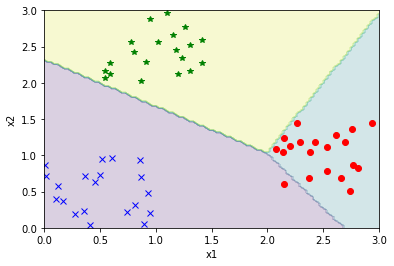

In [67]:
# import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad
# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass perceptron
lam = 10**-21 # reg param
def multiclass_perceptron(x,y,w):
# pre-compute predictions on all points
    all_evals = model(x,w)
    # compute max across data points
    a = np.max(all_evals,axis = 0)
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = np.sum(a-b)
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func
Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2

x1 = np.random.rand(2,Pc)+[[0],[0]]
x2 = np.random.rand(2,Pc)+[[2],[0.5]]
x3 = np.random.rand(2,Pc)+[[0.5],[2]]
x = np.c_[x1,x2,x3]
y = np.c_[0*np.ones((1,Pc)), np.ones((1,Pc)), 2*np.ones((1,Pc))]
plt.figure(1)
plt.plot(x1[0,0:].T,x1[1,0:].T,'xb')
plt.plot(x2[0,0:].T,x2[1,0:].T,'or')
plt.plot(x3[0,0:].T,x3[1,0:].T,'*g')
w = np.ones((N+1,C))
def c(t):
    c = multiclass_perceptron(x,y,t)
    return c
a, b, unflatten = gradient_descent(c,'d',iter,w)
# plt.figure(0)
# plt.plot(b)
wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(0,3,100),np.linspace(0,3,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2')

print(wp)


In [71]:
import csv
import numpy as np
import pandas as pd
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad

df = pd.read_csv("myENGR_518_Solar_energy_datasets.csv")
y = df.iloc[:, 9]
x = df.iloc[:, 4:6]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, train_size=600,random_state=None)
x_train=x_train.T

y_train=y_train.to_frame()
y_train=y_train.T                                                               
print(x_train.shape,y_train.shape)

#plot scaater
x1 = x_train.iloc[:, 1]  # Latitude
x2 = x_train.iloc[:, 0]  # Longitude
colors = ('r', 'b', 'g')
plt.scatter(x1[y == 0], x2[y == 0], c=colors[0])
plt.scatter(x1[y == 1], x2[y == 1], c=colors[1])
plt.scatter(x1[y == 2], x2[y == 2], c=colors[2])
plt.grid(1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

x_train=np.array(x_train)
y_train=np.array(y_train)
# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass perceptron
lam = 10**-21 # reg param
def multiclass_perceptron(x,y,w):
# pre-compute predictions on all points
    all_evals = model(x,w)
    # compute max across data points
    a = np.max(all_evals,axis = 0)
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = np.sum(a-b)
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func
Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2
# N=600

# x1 = np.random.rand(2,Pc)+[[0],[0]]
# x2 = np.random.rand(2,Pc)+[[2],[0.5]]
# x3 = np.random.rand(2,Pc)+[[0.5],[2]]
# x = np.c_[x1,x2,x3]
# y = np.c_[0*np.ones((1,Pc)), np.ones((1,Pc)), 2*np.ones((1,Pc))]
# plt.figure(1)
# plt.plot(x1[0,0:].T,x1[1,0:].T,'xb')
# plt.plot(x2[0,0:].T,x2[1,0:].T,'or')
# plt.plot(x3[0,0:].T,x3[1,0:].T,'*g')
w = np.ones((N+1,C))
def c(t):
    c = multiclass_perceptron(x_train,y_train,t)
    return c
a, b, unflatten = gradient_descent(c,'d',iter,w)
# plt.figure(0)
# plt.plot(b)
wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(-130,-60,100),np.linspace(20,50,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
# plt.xlabel('x1')
# plt.ylabel('x2')
print(wp)




                                                       

(2, 600) (1, 600)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).